In [3]:
using LinearAlgebra
using Plots

In [4]:
function Harr_CUE(n)    #Genera Matrices Ortogonales con ayuda de la mdeida de Harr U(n) con entradas imagniarias CUE
    z = (randn(n,n) + im*randn(n,n))/sqrt(2.0)
    Q,R= qr(z)
    d=Diagonal(R)
    ph = d/abs.(d)
    RR=Q*ph*Q
    return RR
end

function Harr_COE(n) #Genera Matrices Ortogonales con ayuda de la mdeida de Harr O(n) Con entradas reales COE
    z = (randn(n,n) + im*randn(n,n))/sqrt(2.0)
    Q,R= qr(z)
    d=Diagonal(R)
    ph = d/abs.(d)
    RR=Q*ph*Q
    return transpose(RR)*RR
end


Harr_COE (generic function with 1 method)

In [5]:
function HarR(n) #Genera Matrices Ortogonales con ayuda de la mdeida de Harr SO(n) Con entradas reales CRE??
    z = (randn(n,n))
    Q,R= qr(z)
    d=Diagonal(R)
    ph = d/abs.(d)
    RR=Q*ph*Q
    return RR
end

HarR (generic function with 1 method)

In [6]:
function lam_eigenvals_C(λ::Array{Complex{Float64},1})
    λr=Complex{Float64}[]
    for i=1:length(λ)
        if imag(λ[i]) != 0
            push!(λr,λ[i])
        end
    end
    return λr
end

lam_eigenvals_C (generic function with 1 method)

In [7]:
Pb1(s)=(π*s*0.5)*exp(-(π*s^2)/4)
Pb2(s)=(32/(π^2))*(s^2)*exp(-(4*s^2)/π)
Pb4(s)=(2^18/(3^6*π^3))*(s^4)*exp(-(64*s^2)/(9*π))

Pb4 (generic function with 1 method)

In [8]:
 @time begin
    tiradas=10000
    N=3
    λ=Complex{Float64}[] #Obteiene los eigenvalores de las matrices aleatorias O(3)
    for i=1:tiradas
        append!(λ,eigvals(HarR(N)))
    end
end

  1.128511 seconds (3.13 M allocations: 192.921 MiB, 3.53% gc time)


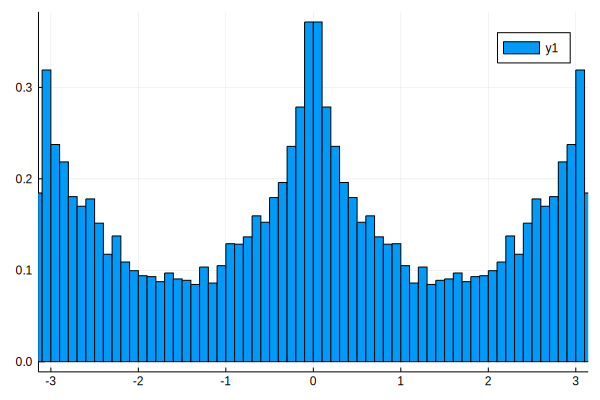

In [9]:
histogram(angle.(lam_eigenvals_C(λ)),normalized=true,bins=60, xlims=(-π,π))#, ylims=(0,1/(2*π))) #Histogrma del angulo de los eigenvalorees de las matrices aleaotrias O(3),dd

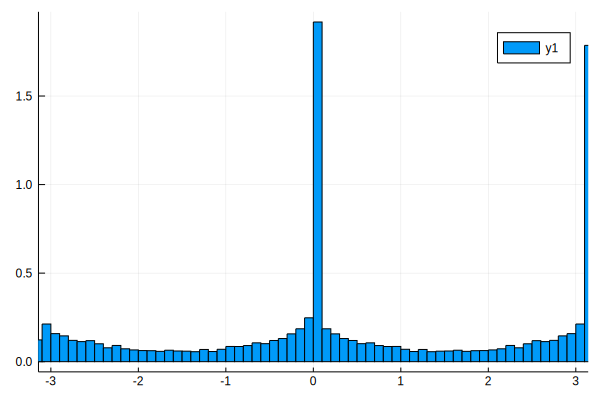

In [10]:
histogram(angle.(λ),normalized=true,bins=60,xlims=(-π,π))  #Histogrma del angulo de los eigenvalorees complejos y reales de las matrices aleaotrias O(3)

In [11]:
@time begin
    θ=Float64[] #Obteiene los eigenvalores de las matrices aleatorias O(3)
    for i=1:tiradas
        append!(θ,sort(angle.(eigvals(HarR(N)))))
    end
end

  0.163504 seconds (679.21 k allocations: 71.144 MiB, 10.49% gc time)


In [12]:
Δθ=Float64[]
for i=1:tiradas
    for j=1:N-1
        s=(θ[((i-1)*N)+1:N*i][j+1]-θ[((i-1)*N)+1:N*i][j])*N/(2*π)
        append!(Δθ,s)
    end
end

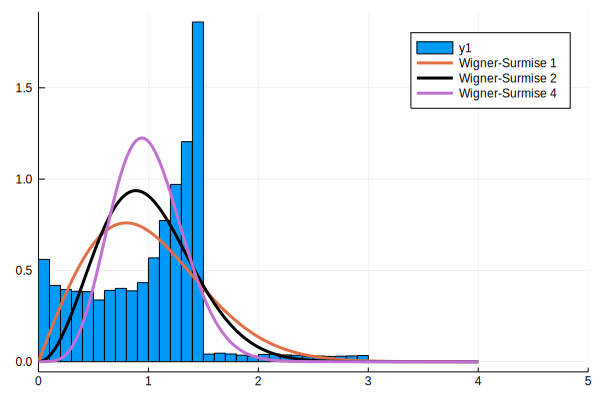

In [13]:
histogram(Δθ, normalize=true)
plot!(0:0.01:4, x->Pb1(x),label="Wigner-Surmise 1",lw = 3)
plot!(0:0.01:4, x->Pb2(x),label="Wigner-Surmise 2",lw = 3,color="black")
plot!(0:0.01:4, x->Pb4(x),label="Wigner-Surmise 4",lw = 3, xlims=(0,5))

In [14]:
U=HarR(3)
det(U)

-1.0000000000000004

In [15]:
@time begin
    tiradas=1000
    N=3
    λ=Complex{Float64}[] #Obteiene los eigenvalores de las matrices aleatorias O(3)
    for i=1:tiradas
        CRE=HarR(N)
        if det(CRE)>0
            append!(λ,eigvals(CRE))
        end
    end
end

  0.017036 seconds (60.16 k allocations: 6.150 MiB)


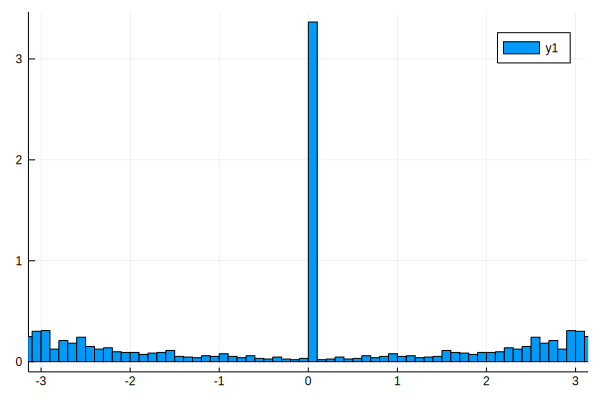

In [16]:
histogram(angle.(λ),normalized=true,bins=60,xlims=(-π,π))  #Histogrma del angulo de los eigenvalorees complejos y reales de las matrices aleaotrias O(3)

In [17]:
function SO(N)
    a=-1
    R=rand(N,N)
    while a<0 
        R=HarR(3)
        a=det(R)
    end
    return R
end

SO (generic function with 1 method)

In [18]:
det(SO(3))

1.0000000000000007

In [19]:
 @time begin
    tiradas=10000
    N=3
    λ=Complex{Float64}[] #Obteiene los eigenvalores de las matrices aleatorias O(3)
    for i=1:tiradas
        append!(λ,eigvals(SO(N)))
    end
end

  0.274187 seconds (1.18 M allocations: 122.836 MiB, 10.69% gc time)


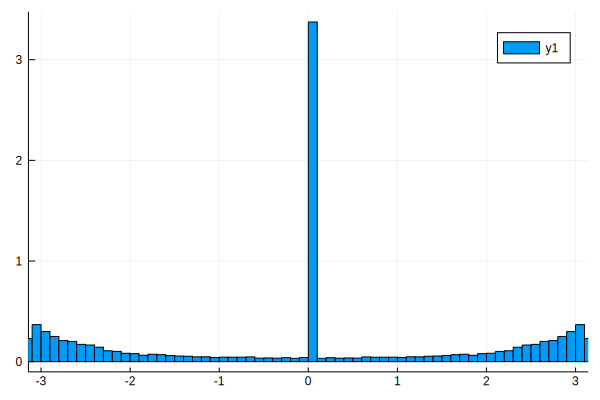

In [20]:
P1=histogram(angle.(λ),normalized=true,bins=60,xlims=(-π,π))

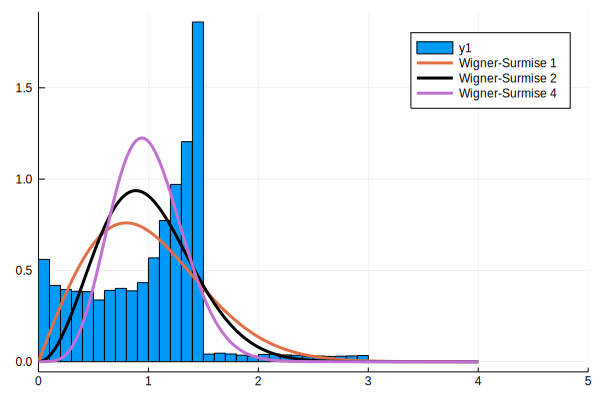

In [21]:
Δθ=Float64[]
for i=1:tiradas
    for j=1:N-1
        s=(θ[((i-1)*N)+1:N*i][j+1]-θ[((i-1)*N)+1:N*i][j])*N/(2*π)
        append!(Δθ,s)
    end
end
histogram(Δθ, normalize=true)
plot!(0:0.01:4, x->Pb1(x),label="Wigner-Surmise 1",lw = 3)
plot!(0:0.01:4, x->Pb2(x),label="Wigner-Surmise 2",lw = 3,color="black")
plot!(0:0.01:4, x->Pb4(x),label="Wigner-Surmise 4",lw = 3, xlims=(0,5))

In [22]:
λ=Complex{Float64}[]
paso=1000
for j=1:tiradas
    M=diagm(0 =>ones(3))
    for i=1:paso
        M=M*SO(3)  #Intentar con HarR y Harr_COE(n) y Harr_CUE(n) y SO(3)
    end
    append!(λ,eigvals(M))
end

In [23]:

scatter(real.(λ),imag.(λ),aspect_ratio=:equal)
savefig("Eigenvalues_CRE.png")


In [24]:
function Espaciamiento_3N(tiradas::Int64,λ_3::AbstractArray)
    Δθ=Float64[]
    for i=1:tiradas
        for j=1:2
            a=(sort(angle.(λ_3)[((i-1)*3)+1:3*i])[j+1]-sort(angle.(λ_3)[((i-1)*3)+1:3*i])[j])
            push!(Δθ,a)
        end
    end
    return Δθ
end

Espaciamiento_3N (generic function with 1 method)

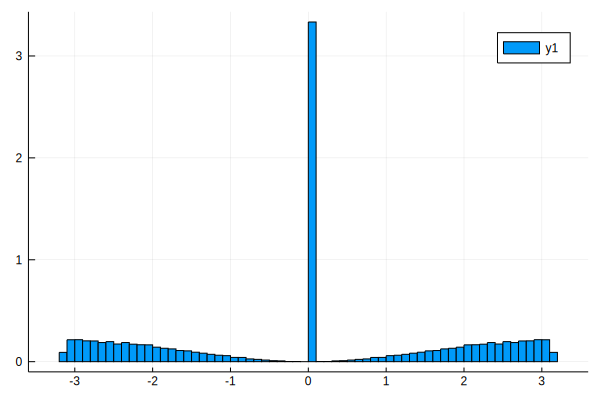

In [25]:
P2=histogram(angle.(λ),normalized=true,bins=60)

In [26]:
Δθ=Espaciamiento_3N(tiradas,λ)

20000-element Array{Float64,1}:
 2.7966581424368577
 2.7966581424368577
 1.6716187336103214
 1.6716187336103214
 0.8324951375360955
 0.8324951375360955
 2.446780080971967 
 2.446780080971967 
 1.364581542131015 
 1.364581542131015 
 1.9047441316370801
 1.9047441316370801
 2.7577909503794595
 ⋮                 
 1.358682016248948 
 1.358682016248948 
 2.731475353973056 
 2.731475353973056 
 1.6813855092239123
 1.6813855092239123
 2.9402899620699237
 2.9402899620699237
 2.726943362014258 
 2.726943362014258 
 1.5223607843628884
 1.5223607843628884

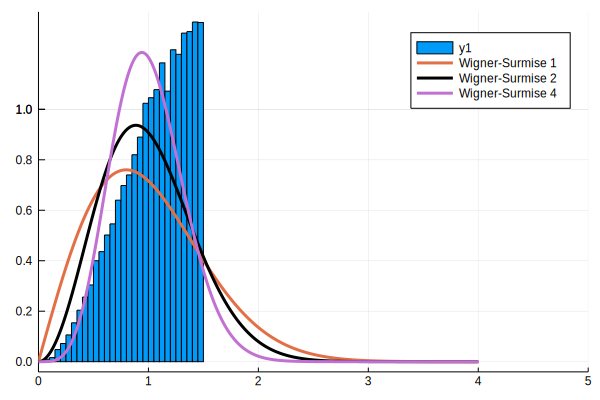

In [27]:
histogram(Δθ*(3/(2*π)),normalized=true)
plot!(0:0.01:4, x->Pb1(x),label="Wigner-Surmise 1",lw = 3)
plot!(0:0.01:4, x->Pb2(x),label="Wigner-Surmise 2",lw = 3,color="black")
plot!(0:0.01:4, x->Pb4(x),label="Wigner-Surmise 4",lw = 3, xlims=(0,5))

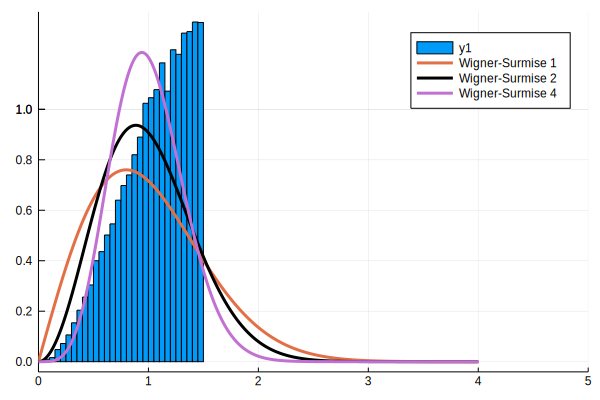

In [28]:
histogram(Δθ*(3/(2*π)),normalized=true)
plot!(0:0.01:4, x->Pb1(x),label="Wigner-Surmise 1",lw = 3)
plot!(0:0.01:4, x->Pb2(x),label="Wigner-Surmise 2",lw = 3,color="black")
plot!(0:0.01:4, x->Pb4(x),label="Wigner-Surmise 4",lw = 3, xlims=(0,5))